In [9]:
import sys
import os

# Añadir el directorio `src` al sys.path para que Python pueda encontrar el módulo
notebooks_dir = os.getcwd()  # Asumiendo que estás en /solution/notebooks
src_path = os.path.abspath(os.path.join(notebooks_dir, "..", "src"))
sys.path.append(src_path)
print(src_path)


C:\Users\nicol\Desktop\ifco-assessment\data-engineering-test\solution\src


In [12]:
import os
from task_1_crate_distribution import load_csv_to_dataframe, calculate_crate_distribution, bar_plot_df

# Gets the root project path (subiendo dos niveles hacia arriba en lugar de uno)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

# Builds the file path for resources in order to retrieve orders.csv
filepath = os.path.join(project_root, "resources", "orders.csv")

# Verify the path
print(f"Path to orders.csv: {filepath}")

# Read the file as DataFrame
raw_df = load_csv_to_dataframe(filepath)
raw_df.head()

Path to orders.csv: C:\Users\nicol\Desktop\ifco-assessment\data-engineering-test\resources\orders.csv


,order_id,date,company_id,company_name,crate_type,contact_data,salesowners
0,f47ac10b-58cc-4372-a567-0e02b2c3d479,29.01.22,1e2b47e6-499e-41c6-91d3-09d12dddfbbd,Fresh Fruits Co,Plastic,"[{ ""contact_name"":""Curtis"", ""contact_surname"":...","Leonard Cohen, Luke Skywalker, Ammy Winehouse"
1,f47ac10b-58cc-4372-a567-0e02b2c3d480,21.02.22,0f05a8f1-2bdf-4be7-8c82-4c9b58f04898,Veggies Inc,Wood,"[{ ""contact_name"":""Maria"", ""contact_surname"":""...","Luke Skywalker, David Goliat, Leon Leonov"
2,f47ac10b-58cc-4372-a567-0e02b2c3d481,03.04.22,1e2b47e6-499e-41c6-91d3-09d12dddfbbd,Fresh Fruits c.o,Metal,"[{ ""contact_name"":""Para"", ""contact_surname"":""C...",Luke Skywalker
3,f47ac10b-58cc-4372-a567-0e02b2c3d482,14.07.21,1c4b0b50-1d5d-463a-b56e-1a6fd3aeb7d6,Seafood Supplier,Plastic,NaN,"David Goliat, Leonard Cohen"
4,f47ac10b-58cc-4372-a567-0e02b2c3d483,23.10.22,34538e39-cd2e-4641-8d24-3c94146e6f16,Meat Packers Ltd,Plastic,NaN,"Chris Pratt, David Henderson, Marianov Merschi..."


In [13]:
# Create the processed dataframe with the aggregation.
processed_df = calculate_crate_distribution(raw_df)
processed_df.head()

crate_type,Metal,Plastic,Wood
company_name,,,
Farm Fresh Co,1,0,0
Farm Fresh Ltd,0,1,0
Farms Global Co,1,0,0
Fresh Berries Inc,0,1,0
Fresh Farms Ltd,0,0,1


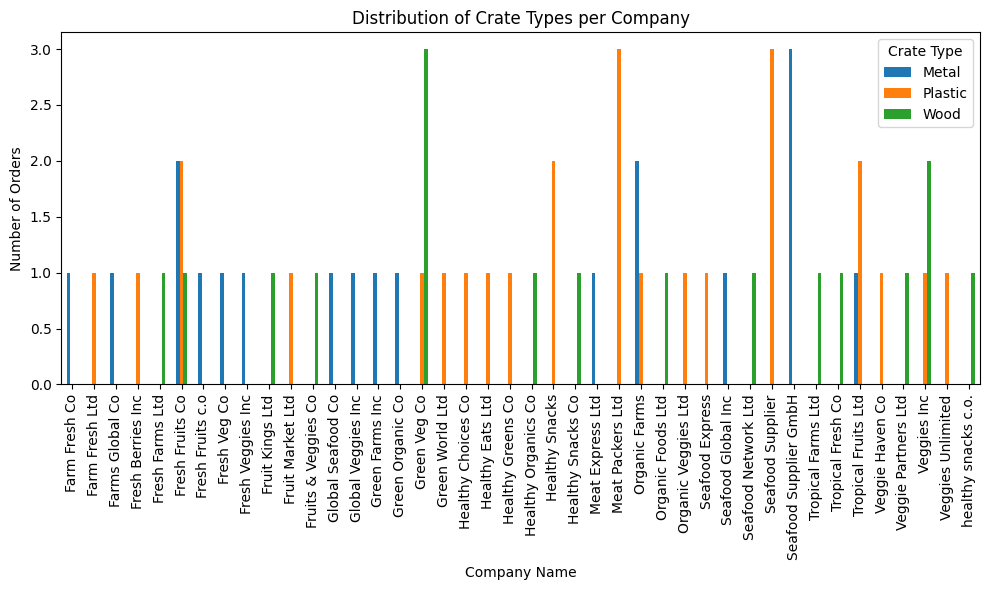

In [4]:
# Call the plot function with the DataFrame
bar_plot_df(processed_df)